PM10 contours of 2nd of September, 2022, which is a dust event happened in San Tan Valley. 
(Massive dust storm hits San Tan Valley southeast of Phoenix | 12news.com
https://www.12news.com/article/weather/monsoon/dust-storm-southeast-valley/75-b49378ad-ac27-4fc8-98d3-9ad3dda433f4)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
path = '/home/cshu2/clim680/'
fname = 'PM10_20220902.nc'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (time: 24, lay: 35, lat: 265, lon: 442)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24
  * lay      (lay) int32 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * lat      (lat) float32 21.83 21.93 22.03 22.13 ... 48.47 48.57 48.67 48.77
  * lon      (lon) float32 -120.6 -120.5 -120.4 -120.3 ... -71.01 -70.91 -70.8
Data variables:
    PM       (time, lay, lat, lon) float32 ...

In [3]:
ds_mean=ds.mean(dim='time')
ds_mean

<xarray.Dataset>
Dimensions:  (lay: 35, lat: 265, lon: 442)
Coordinates:
  * lay      (lay) int32 1 2 3 4 5 6 7 8 9 10 ... 26 27 28 29 30 31 32 33 34 35
  * lat      (lat) float32 21.83 21.93 22.03 22.13 ... 48.47 48.57 48.67 48.77
  * lon      (lon) float32 -120.6 -120.5 -120.4 -120.3 ... -71.01 -70.91 -70.8
Data variables:
    PM       (lay, lat, lon) float32 2.126 4.292 5.887 ... 0.05098 0.05378

''

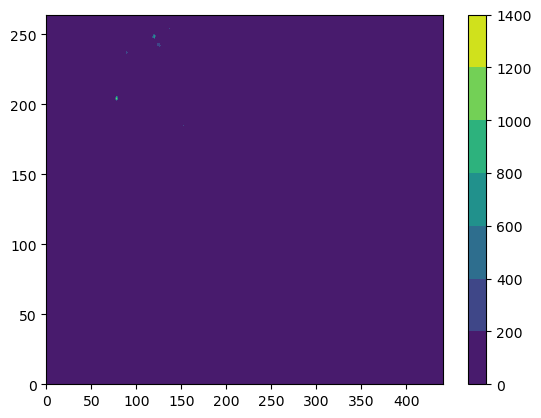

In [4]:
plt.contourf(ds['PM'][0,0,:,:])
plt.colorbar() 
;

''

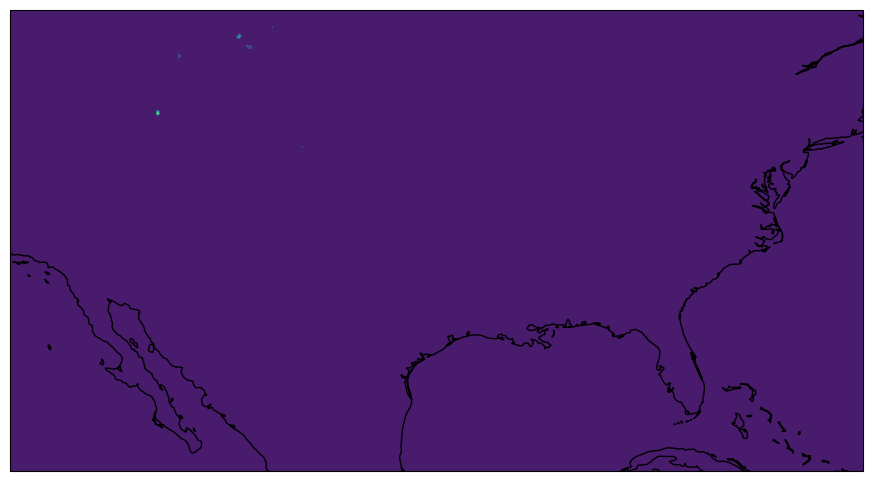

In [5]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Make a filled contour plot
ax.contourf(ds['lon'], ds['lat'], ds['PM'][0,0,:,:],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines() 
;

''

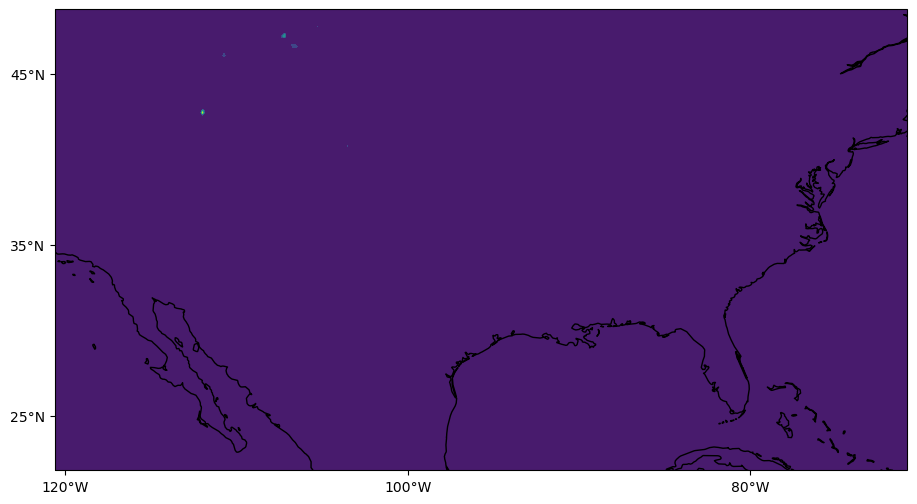

In [6]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Make a filled contour plot
ax.contourf(ds['lon'], ds['lat'], ds['PM'][0,0,:,:],
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 
;

''

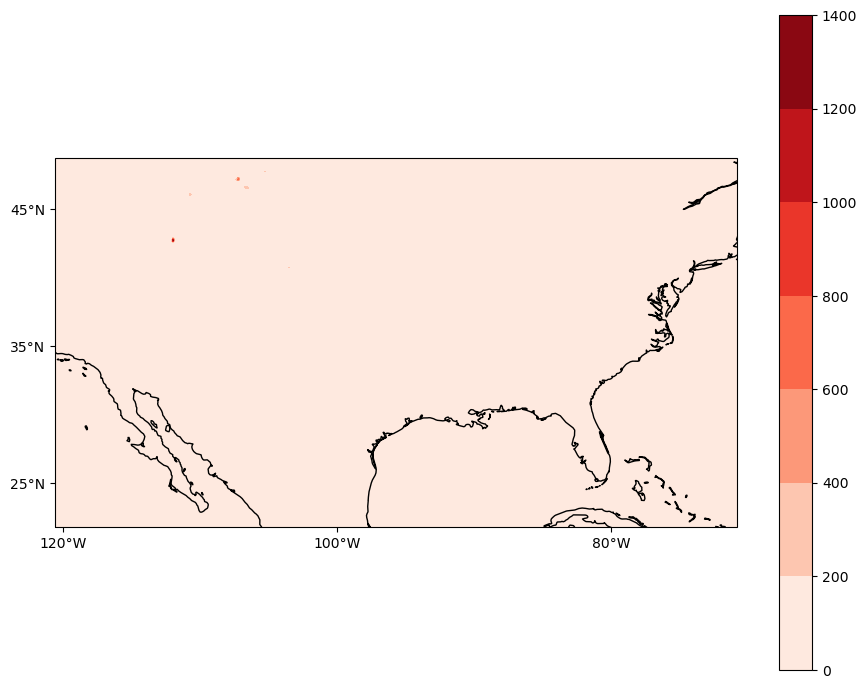

In [7]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Make a filled contour plot
cs = ax.contourf(ds['lon'], ds['lat'], ds['PM'][0,0,:,:],
            transform = ccrs.PlateCarree(),cmap='Reds',
            )

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 
# Add colorbar
cbar = plt.colorbar(cs) 
;

''

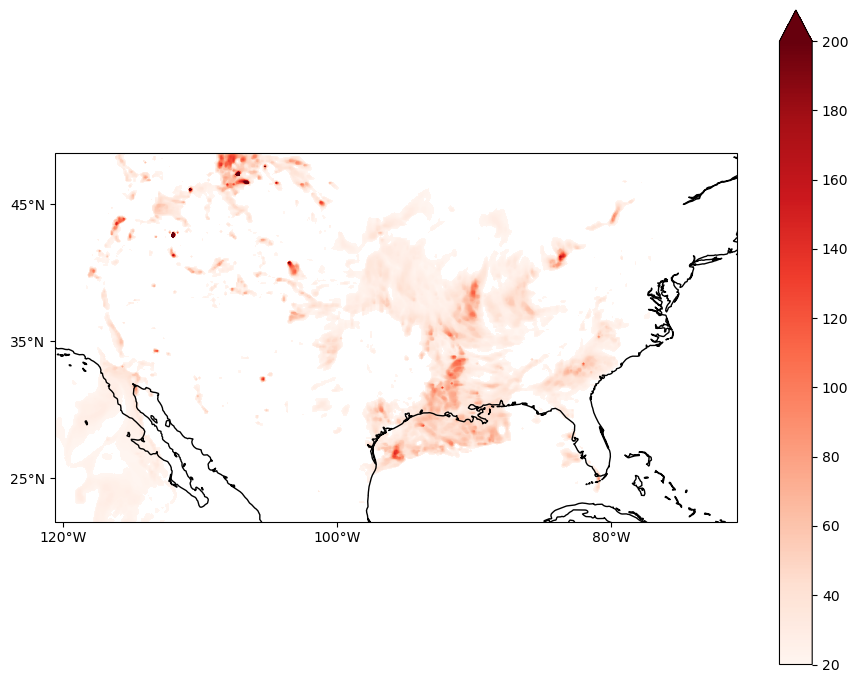

In [8]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())


# Make a filled contour plot
vmin = 20
vmax = 200

from matplotlib.cm import ScalarMappable
levels = 400

level_boundaries = np.linspace(vmin, vmax, levels + 1)

cs = ax.contourf(
            ds['lon'], ds['lat'], ds['PM'][0,0,:,:],
            level_boundaries,
            vmin=vmin, vmax=vmax,
            extend='max',
            transform = ccrs.PlateCarree(),cmap='Reds'
            )

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 
# Add colorbar
cbar = plt.colorbar(
            cs,
            ticks=range(vmin, vmax+20, 20),
            boundaries=level_boundaries
            ) 
;

''

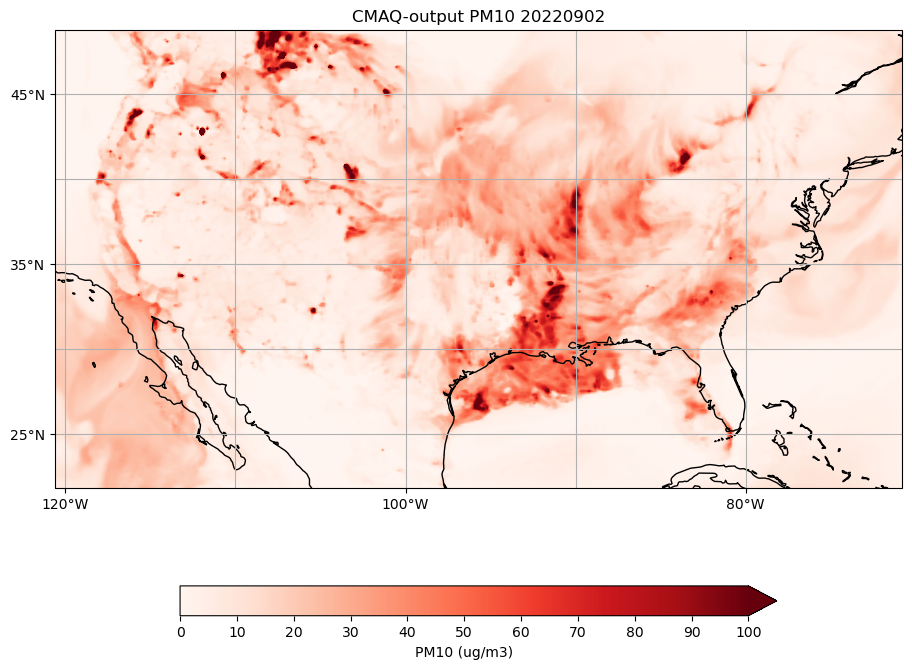

In [9]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
#ax=plt.axes(projection=ccrs.Robinson())


# Make a filled contour plot
vmin = 0
vmax = 100

from matplotlib.cm import ScalarMappable
levels = 400

level_boundaries = np.linspace(vmin, vmax, levels + 1)

cs = ax.contourf(
            ds['lon'], ds['lat'], ds['PM'][0,0,:,:],
            level_boundaries,
            vmin=vmin, vmax=vmax,
            extend='max',
            transform = ccrs.PlateCarree(),cmap='Reds'
            )

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 
# Add colorbar
cbar = plt.colorbar(
            cs,
            shrink=0.7,
            orientation='horizontal',
            label='PM10 (ug/m3)',
            ticks=range(vmin, vmax+10, 10),
            boundaries=level_boundaries
            ) 
# Add title
plt.title('CMAQ-output PM10 20220902')
;

''

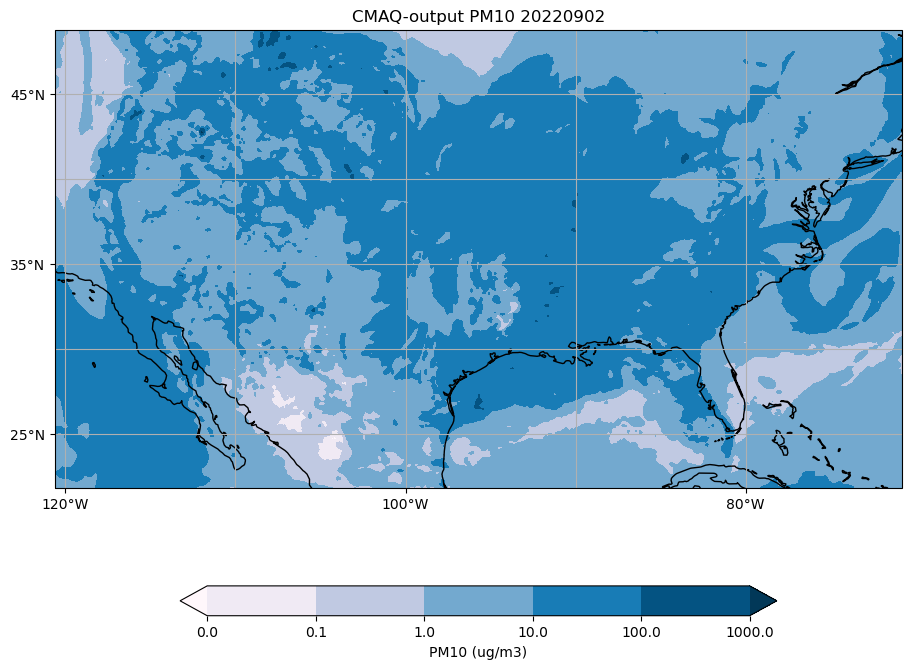

In [10]:
from matplotlib import ticker, cm

# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
#ax=plt.axes(projection=ccrs.Robinson())


# Make a filled contour plot
vmin = 0
vmax = 100

from matplotlib.cm import ScalarMappable
levels = 400

level_boundaries = np.linspace(vmin, vmax, levels + 1)

cs = ax.contourf(
            ds['lon'], ds['lat'], ds['PM'][0,0,:,:],
            #level_boundaries,
            locator=ticker.LogLocator(),
            #vmin=vmin, vmax=vmax,
            extend='both',
            transform = ccrs.PlateCarree(),
            #cmap='Reds'
            cmap=cm.PuBu
            )

# Add coastlines
ax.coastlines()

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 
# Add colorbar
cbar = plt.colorbar(
            cs,
            shrink=0.7,
            orientation='horizontal',
            label='PM10 (ug/m3)',
            #ticks=range(vmin, vmax+10, 10),
            #boundaries=level_boundaries
            ) 
# Add title
plt.title('CMAQ-output PM10 20220902')
;

''

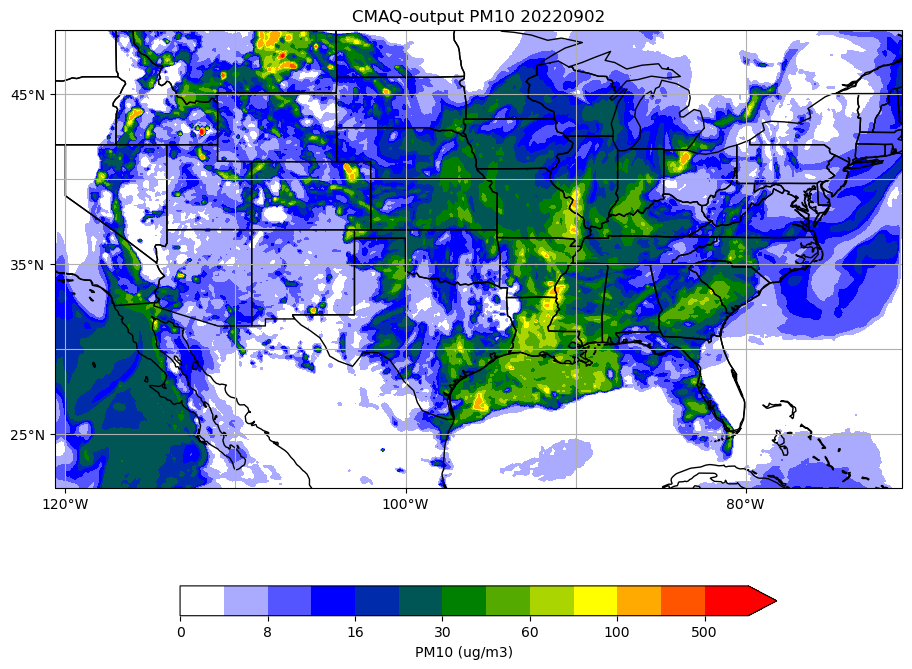

In [12]:
import matplotlib.colors as colors
import cartopy.feature as cfeature

# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())
#ax=plt.axes(projection=ccrs.Robinson())


# Make a filled contour plot
vmin = 0
vmax = 100

from matplotlib.cm import ScalarMappable
levels = 400

level_boundaries = np.linspace(vmin, vmax, levels + 1)

clevs = [0,4,8,12,16,20,30,40,60,80,100,200,500,1000]
colorslist = ['white','blue','green','yellow','red']
colormap = colors.LinearSegmentedColormap.from_list('123',colorslist,N=13)

norm = matplotlib.colors.BoundaryNorm(clevs,len(clevs))

cs = ax.contourf(
            ds['lon'], ds['lat'], ds['PM'][0,0,:,:],
            clevs,
            cmap = colormap,
            norm = norm,
            extend='max',
            transform = ccrs.PlateCarree(),
            )

# Add coastlines and stateslines
ax.coastlines()
ax.add_feature(cfeature.STATES.with_scale('110m'))

# Add gridlines
ax.gridlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 
# Add colorbar
cbar = plt.colorbar(
            cs,
            shrink=0.7,
            orientation='horizontal',
            label='PM10 (ug/m3)',
            #ticks=range(vmin, vmax+10, 10),
            #boundaries=level_boundaries
            ) 
# Add title
plt.title('CMAQ-output PM10 20220902')
;